# 2021-09-07 

In [1]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from scipy import signal
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# load data
PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_arr'
os.chdir(PATH_IN)
rpeakList = [i for i in os.listdir(PATH_IN) if i.startswith('correct')]
fxvalList = [i for i in os.listdir(PATH_IN) if i.startswith('filtered')]

In [3]:
# check sample 
rpeaks = pd.read_csv(rpeakList[0], header=None)
fxvalList = pd.read_csv(fxvalList[0], header=None)

In [4]:
# min-max normalization 
min_max_scaler = MinMaxScaler()
fxvals = fxvalList

# minmax normalization for fxvals(ECG Voltage)
fxvals_MinMax = min_max_scaler.fit_transform(fxvals)

# examples
fxvals_MinMax[370], fxvals_MinMax[662], fxvals_MinMax[947]

(array([0.78493163]), array([0.78982738]), array([0.77506309]))

(0    1.088302
 dtype: float64,
 0   -0.312092
 dtype: float64)

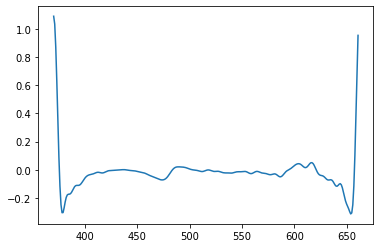

In [6]:
# sample for r-r interval plot
plt.plot(fxvals[370:662])
np.max(fxvals[370:662]), np.min(fxvals[370:662])

(0.7849316273137059, 0.36691101761915085)

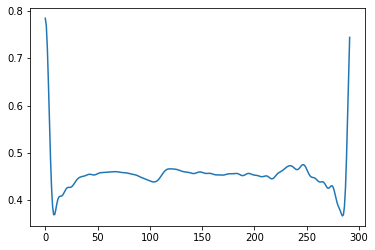

In [7]:
plt.plot(fxvals_MinMax[370:662])
np.max(fxvals_MinMax[370:662]), np.min(fxvals_MinMax[370:662])

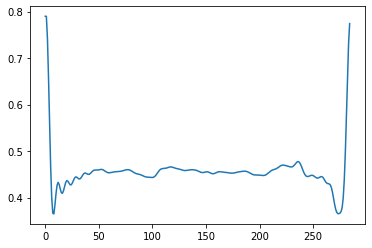

In [8]:
plt.plot(fxvals_MinMax[662:947])

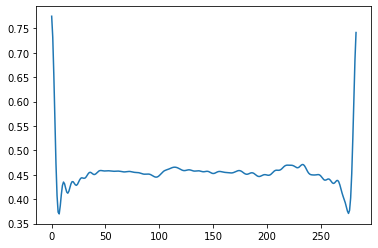

In [9]:
plt.plot(fxvals_MinMax[947:1231])

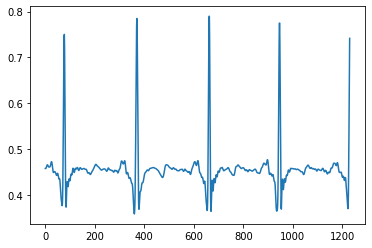

In [10]:
plt.plot(fxvals_MinMax[:1231])

(array([1.000e+01, 1.800e+01, 3.100e+01, 3.790e+02, 1.452e+03, 3.510e+02,
        1.300e+01, 1.600e+01, 0.000e+00, 1.000e+00]),
 array([179. , 203.2, 227.4, 251.6, 275.8, 300. , 324.2, 348.4, 372.6,
        396.8, 421. ]),
 <BarContainer object of 10 artists>)

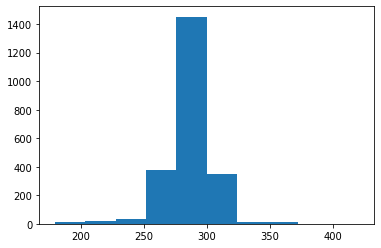

In [11]:
# rr-interval
rr_intervals = []
for i in range(len(rpeaks)):
    if i + 1 == len(rpeaks):
        break
    else:
        rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
        rr_intervals.append(int(rr_interval))

        
plt.hist(rr_intervals)# np.mean(rr_intervals), np.median(rr_intervals), np.max(rr_intervals)

In [12]:
display(pd.DataFrame(rr_intervals).describe())
display(np.median(rr_intervals))

,0
count,2271.000000
mean,286.066050
std,17.663149
min,179.000000
25%,278.000000
50%,287.000000
75%,296.000000
max,421.000000


287.0

In [13]:
# rr_interval, yvals
rr_intervals = []
y_vals = []
for i in range(len(rpeaks)):
    if i + 1 == len(rpeaks):
        break
    else:
        rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
        y_val = fxvals_MinMax[int(rpeaks.iloc[i]):int(rpeaks.iloc[i+1])]
        rr_intervals.append(int(rr_interval))
        y_vals.append(y_val)
        
len(y_vals), len(rr_intervals)

(2271, 2271)

In [14]:
# check for resampling

from scipy import signal
# x =  list(range(rr_intervals[0]))
y = y_vals[0]
f = signal.resample(y_vals[0], int(np.median(rr_intervals)))

len(f), len(y_vals[0])

(287, 293)

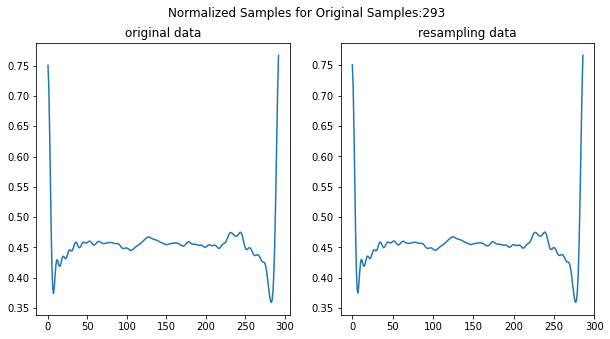

In [15]:
# compare resampling data with original data

import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.suptitle('Normalized Samples for Original Samples:{}'.format(len(y_vals[0])))

plt.subplot(121)
plt.plot(y_vals[0])
plt.title('original data')
 
plt.subplot(122)
plt.plot(f)
plt.title('resampling data')
plt.show()

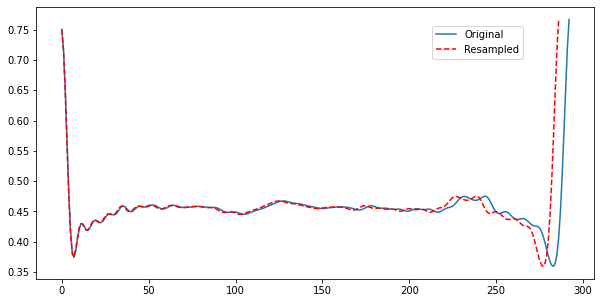

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(y_vals[0], label='Original')
plt.plot(f, 'r--', label='Resampled')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 0.95))

## resampling based on RR-intervals' mean 

In [17]:
# Already porcessed
# # Split samples based on rr_intervals 
# rr_intervals = []
# y_vals = []
# for i in range(len(rpeaks)):
#     if i + 1 == len(rpeaks):
#         break
#     else:
#         rr_interval = rpeaks.iloc[i+1] - rpeaks.iloc[i]
#         y_val = fxvals_MinMax[int(rpeaks.iloc[i]):int(rpeaks.iloc[i+1])]
#         rr_intervals.append(int(rr_interval))
#         y_vals.append(y_val)

# resampling
from scipy import signal
new_yvals = []
norm_sample= int(np.median(rr_intervals))
for i in range(len(y_vals)):
    new_yval = signal.resample(y_vals[i], norm_sample)
    new_yvals.append(new_yval)

In [18]:
# label rr_invervals as rrid_1, rrid_2 .. rrid_n
rrids = ["rrid_" + str(i) for i in range(len(rr_intervals))]

# create a dictionary
rr_dict = dict(zip(rrids, new_yvals))

# get all the book ids in a list
ids = list(rr_dict.keys())

# create all possible pairs
base_rr = []
target_rr = []
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        base_rr.append(ids[i])
        target_rr.append(j)
        pairs.append((ids[i], j))        

In [19]:
print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
display(pairs[:10])
print("....")
print("Displaying last 10 pairs: ")
display(pairs[-10:])

There are a total of 2577585 pairs
Displaying first 10 pairs: 


[('rrid_0', 'rrid_1'),
 ('rrid_0', 'rrid_2'),
 ('rrid_0', 'rrid_3'),
 ('rrid_0', 'rrid_4'),
 ('rrid_0', 'rrid_5'),
 ('rrid_0', 'rrid_6'),
 ('rrid_0', 'rrid_7'),
 ('rrid_0', 'rrid_8'),
 ('rrid_0', 'rrid_9'),
 ('rrid_0', 'rrid_10')]

....
Displaying last 10 pairs: 


[('rrid_2266', 'rrid_2267'),
 ('rrid_2266', 'rrid_2268'),
 ('rrid_2266', 'rrid_2269'),
 ('rrid_2266', 'rrid_2270'),
 ('rrid_2267', 'rrid_2268'),
 ('rrid_2267', 'rrid_2269'),
 ('rrid_2267', 'rrid_2270'),
 ('rrid_2268', 'rrid_2269'),
 ('rrid_2268', 'rrid_2270'),
 ('rrid_2269', 'rrid_2270')]

### Make DataFrame for each pair and cosine similarity 

In [32]:
# create a dataframe
base_ids = []
target_ids = []
final_similarities = []


# calculate base, target, similarity using Resampling data: new_yvals
for i in range(len(new_yvals)):
    if i+1 < len(new_yvals):
        base_ids.append(ids[i])
        target_ids.append(ids[i+1])
        final_similarity = 1- distance.cosine(new_yvals[i], new_yvals[i+1])
        final_similarities.append(final_similarity)

In [34]:
len(base_ids), len(target_ids), len(final_similarities)

(2270, 2270, 2270)

In [53]:
new_yvals[2270][286]

array([0.74973852])

In [38]:
final_similarities[1]

0.9995794817559639

In [ ]:
pointids = ['point_' + str(i) for i in range(len(new_yvals[0]))]
similarityids = ['similarity_' + str(i) for i in range(len(new_yvals[0]))]
#point = ['point_' + str(i) for i in range(len(new_yvals[0]))]

# make lists for each point values in rr-intevals(#2270) #1list = (point)*2270(num)
for i in range(len(new_yvals[0])):
    pointids[i] = [] 
    for j in range(len(new_yvals)):
        pointids[i].append(new_yvals[j][i])
        center = np.medain(pointids[i])
        point_similarity = distance.cosine(center, new_yvals[j][i])
        point_similarity
    print(i)

        
        
#    point.append(new_yvals[i])
# for i in range(len(new_yvals)):
    


In [86]:
len(pointids[0]), len(pointids[1])

(2271, 2271)

In [66]:
range(new_yvals[0])

TypeError: only integer scalar arrays can be converted to a scalar index

In [67]:


#bookids = ["point_" + str(i) for i in range(num_books)]

In [70]:
pointids[0] = [] 

In [72]:
pointids[0] 

[]

In [ ]:
# create a dataframe
df = pd.DataFrame({'pair':pairs, 'base_rr': base_rr, 'target_rr': target_rr, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

In [ ]:
        
    rr_inetrvals[i], rr_interavlas 
        base_rr.append(ids[i])
        target_rr.append(j)
        pairs.append((ids[i], j))    

In [40]:
ids[0]

'rrid_0'

In [42]:
# create a dataframe
df = pd.DataFrame({'pair':pairs, 'base_rr': base_rr, 'target_rr': target_rr, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

NameError: name 'pairwise_cosine_similarity' is not defined

In [ ]:
final_similarity = [1-distance.cosine(rr_dict[pair[0]], rr_dict[pair[1]]) for pair in pairs]

In [41]:
display(df.head())
display(df.tail())

NameError: name 'df' is not defined